In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from tensorflow import keras
from google.colab import files
from io import BytesIO
from PIL import Image
from urllib.request import urlopen


model = keras.applications.ResNet50()

model.summary() # Вывод краткого описания архитектуры созданной модели
model.get_config() # Вывод конфигурации созданной модели

102967424/102967424 [==============================] - 2s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

{'name': 'resnet50',
 'trainable': True,
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'name': 'input_1',
   'inbound_nodes': []},
  {'class_name': 'ZeroPadding2D',
   'config': {'name': 'conv1_pad',
    'trainable': True,
    'dtype': 'float32',
    'padding': ((3, 3), (3, 3)),
    'data_format': 'channels_last'},
   'name': 'conv1_pad',
   'inbound_nodes': [[['input_1', 0, 0, {}]]]},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv1_conv',
    'trainable': True,
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (7, 7),
    'strides': (2, 2),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Ze

1.2. Загрузите из сети Интернет 5 изображений с разными классами, из тех, что приведены в списке, и сохраните их представление в список images

In [3]:
req0 = urlopen('https://cf.ltkcdn.net/reptiles/amphibians-and-other-species/images/orig/323869-1600x1066-axolotl-facts-as-unique-as-walking-fish.jpg') # используя метод urlopen, получаем объект запроса по ссылке (изображение)
                                                                                      # и сохраняем его в виде потокового набора данных в переменную "req"
req1 = urlopen('https://www.thesprucepets.com/thmb/eS76P1vw-0DrYKhCXd-2553h3sw=/4724x0/filters:no_upscale():strip_icc()/GettyImages-634869043-58a6e83f5f9b58a3c918ca12.jpg')
req2 = urlopen('https://www.nhm.ac.uk/content/dam/nhmwww/discover/bittern-recovery/bittern-recovery-full-width.jpg.thumb.1160.1160.jpg')
req3 = urlopen('https://www.purina.co.uk/sites/default/files/styles/square_medium_440x440/public/2022-07/Afghan%20Hound1.jpg?h=98eb79ba&itok=YDdbperM')
req4 = urlopen('https://img.passeportsante.net/1200x675/2022-05-02/leonberg.jpeg')

image_0 = np.asarray(bytearray(req0.read()), dtype=np.uint8) # преобразуем потоковый набор данных в массив numpy
image_0 = cv2.imdecode(image_0, -1) # декодируем изображение в привычный для отображения формат

image_1 = np.asarray(bytearray(req1.read()), dtype=np.uint8) # преобразуем потоковый набор данных в массив numpy
image_1 = cv2.imdecode(image_1, -1) # декодируем изображение в привычный для отображения формат

image_2 = np.asarray(bytearray(req2.read()), dtype=np.uint8) # преобразуем потоковый набор данных в массив numpy
image_2 = cv2.imdecode(image_2, -1) # декодируем изображение в привычный для отображения формат

image_3 = np.asarray(bytearray(req3.read()), dtype=np.uint8) # преобразуем потоковый набор данных в массив numpy
image_3 = cv2.imdecode(image_3, -1) # декодируем изображение в привычный для отображения формат

image_4 = np.asarray(bytearray(req4.read()), dtype=np.uint8) # преобразуем потоковый набор данных в массив numpy
image_4 = cv2.imdecode(image_4, -1) # декодируем изображение в привычный для отображения формат

cv2_imshow(image_0) # Выводим изображение, используя метод cv2_imshow()
cv2_imshow(image_1) # Выводим изображение, используя метод cv2_imshow()
cv2_imshow(image_2) # Выводим изображение, используя метод cv2_imshow()
cv2_imshow(image_3) # Выводим изображение, используя метод cv2_imshow()
cv2_imshow(image_4) # Выводим изображение, используя метод cv2_imshow()


Output hidden; open in https://colab.research.google.com to view.

In [4]:
def normalize(images, shape):
  proc_images = np.array(images)
  proc_images = cv2.resize(proc_images, (shape[0], shape[1]))
  proc_images = proc_images.reshape(-1, shape[0], shape[1], shape[2])


  return proc_images

In [5]:
input_image0 = normalize(image_0, (224,224,3))
input_image0 = keras.applications.resnet50.preprocess_input(input_image0) # Здесь метод preprocess_input преобразовывает изображение из формата RGB в формат BGR (на котором обучалась сеть VGG-16) и,
                                                                     # кроме того, уменьшает средние значения каждого цветового канала на величины: (B) 103.939, (G) 116.779 и (R) 123.68
print(input_image0.shape)

input_image1 = normalize(image_1, (224,224,3))
input_image1 = keras.applications.resnet50.preprocess_input(input_image1) # Здесь метод preprocess_input преобразовывает изображение из формата RGB в формат BGR (на котором обучалась сеть VGG-16) и,
                                                                     # кроме того, уменьшает средние значения каждого цветового канала на величины: (B) 103.939, (G) 116.779 и (R) 123.68
print(input_image1.shape)

input_image2 = normalize(image_2, (224,224,3))
input_image2 = keras.applications.resnet50.preprocess_input(input_image2) # Здесь метод preprocess_input преобразовывает изображение из формата RGB в формат BGR (на котором обучалась сеть VGG-16) и,
                                                                     # кроме того, уменьшает средние значения каждого цветового канала на величины: (B) 103.939, (G) 116.779 и (R) 123.68
print(input_image2.shape)

input_image3 = normalize(image_3, (224,224,3))
input_image3 = keras.applications.resnet50.preprocess_input(input_image3) # Здесь метод preprocess_input преобразовывает изображение из формата RGB в формат BGR (на котором обучалась сеть VGG-16) и,
                                                                     # кроме того, уменьшает средние значения каждого цветового канала на величины: (B) 103.939, (G) 116.779 и (R) 123.68
print(input_image3.shape)

input_image4 = normalize(image_4, (224,224,3))
input_image4 = keras.applications.resnet50.preprocess_input(input_image4) # Здесь метод preprocess_input преобразовывает изображение из формата RGB в формат BGR (на котором обучалась сеть VGG-16) и,
                                                                     # кроме того, уменьшает средние значения каждого цветового канала на величины: (B) 103.939, (G) 116.779 и (R) 123.68
print(input_image4.shape)

(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


In [6]:
res0 = model.predict(input_image0)
res1 = model.predict(input_image1)
res2 = model.predict(input_image2)
res3 = model.predict(input_image3)
res4 = model.predict(input_image4)
print(np.argmax(res0)) # Вывод номера класса объекта
print(np.argmax(res1)) # Вывод номера класса объекта
print(np.argmax(res2)) # Вывод номера класса объекта
print(np.argmax(res3)) # Вывод номера класса объекта
print(np.argmax(res4)) # Вывод номера класса объекта

1/1 [==============================] - 0s 154ms/step
29
88
133
160
177


In [7]:
print(keras.applications.resnet50.decode_predictions(res0, top=3)) 
print(keras.applications.resnet50.decode_predictions(res1, top=3)) 
print(keras.applications.resnet50.decode_predictions(res2, top=3)) 
print(keras.applications.resnet50.decode_predictions(res3, top=3))
print(keras.applications.resnet50.decode_predictions(res4, top=3)) 

35363/35363 [==============================] - 0s 0us/step
[[('n01632777', 'axolotl', 0.99935156), ('n01950731', 'sea_slug', 0.00028268617), ('n01675722', 'banded_gecko', 7.01684e-05)]]
[[('n01818515', 'macaw', 0.9909395), ('n01820546', 'lorikeet', 0.0036318009), ('n01806143', 'peacock', 0.003246658)]]
[[('n02011460', 'bittern', 0.24075699), ('n02018795', 'bustard', 0.19911242), ('n01601694', 'water_ouzel', 0.07979181)]]
[[('n02088094', 'Afghan_hound', 0.999959), ('n02091831', 'Saluki', 3.33789e-05), ('n02090622', 'borzoi', 2.613575e-06)]]
[[('n02092002', 'Scottish_deerhound', 0.80006087), ('n02097209', 'standard_schnauzer', 0.03322171), ('n02090721', 'Irish_wolfhound', 0.027580483)]]


#Задание 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
#загружаем датасет по ссылке
import pathlib
dataset_url = "http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar"
data_dir = tf.keras.utils.get_file('Images', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [3]:
#выводим путь к датасету
print(data_dir)

/root/.keras/datasets/Images


/root/.keras/datasets/Images/n02112018-Pomeranian/n02112018_2336.jpg


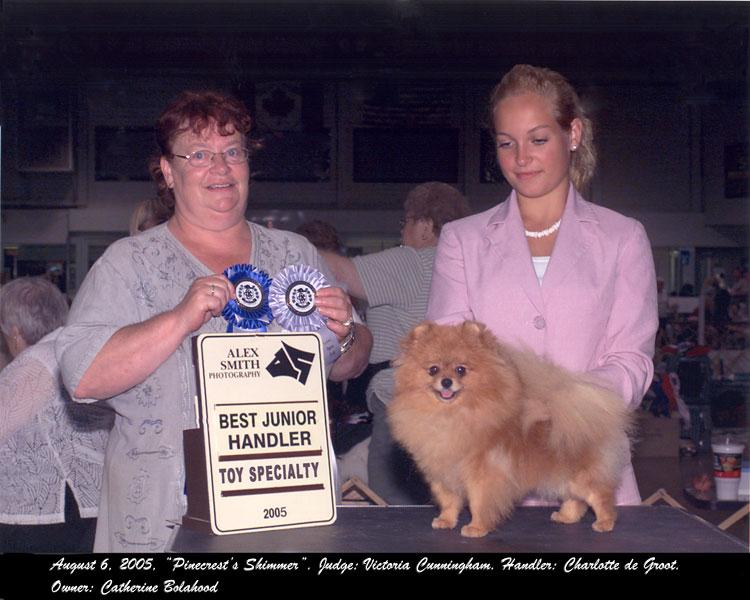

(600, 750, 3)

In [4]:
#выводим фрагмент из датасета
pomeranian_images = list(data_dir.glob('n02112018-Pomeranian/*'))
image_path = pomeranian_images[0]
print(image_path)
image = cv2.imread(str(image_path))
cv2_imshow(image)
image.shape

In [5]:
#формируем обучающую и валидационную выборки, а также меняем разрешение для каждого элемента датасета
img_height, img_width = 180, 180
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


In [7]:
#выведем метки классов
class_names = train_ds.class_names
print(class_names)

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

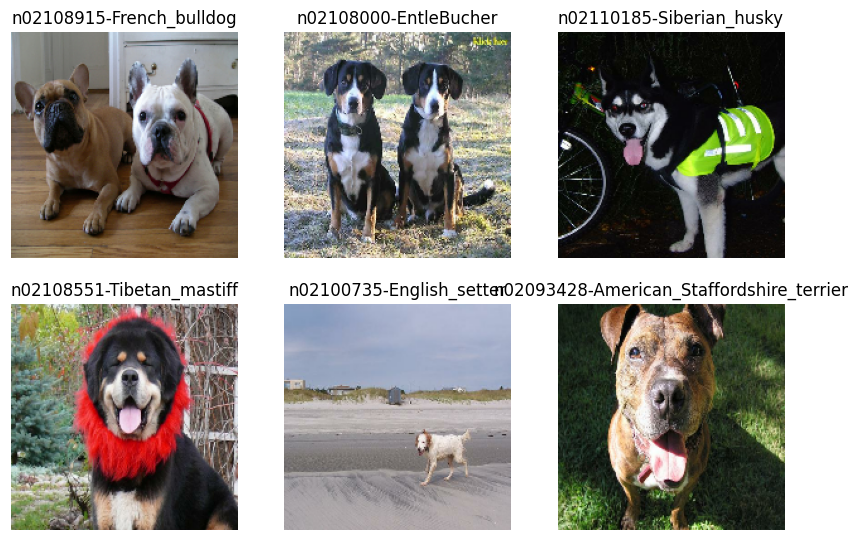

In [8]:
#отобразим часть данных из обучающей выборки
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
# Добавляем предобученную модель ResNet50
base_model = tf.keras.applications.ResNet50(include_top=False, # убираем полносвязные слои
                   input_shape=(180,180,3), # меняем параметры входных данных на свои
                   pooling='avg', # значение параметра означает, что после последнего сверточного слоя будет применена операция среднего пулинга
                   weights='imagenet') # указываем используемые веса (путь к файлу с предобученными весами)

base_model.summary()
#base_model.get_config()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 186, 186, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 90, 90, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 90, 90, 64)   256         ['conv1_conv[0][0]']      

In [10]:
# Вариант 2. Заморозить каждый слой по отдельности
for layer in base_model.layers:
    layer.trainable=False

In [11]:
my_model = Sequential()
my_model.add(base_model)
my_model.add(Flatten())
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(120, activation='softmax'))
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 120)              61560     
 pper)                                                           
                                                                 
Total params: 24,698,360
Trainable params: 1,110,648
Non-trainable params: 23,587,712
____________________________________

In [12]:
my_model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
epochs=5
history = my_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
515/515 [==============================] - 2045s 4s/step - loss: 2.4961 - accuracy: 0.3669 - val_loss: 1.9057 - val_accuracy: 0.4789
Epoch 2/5
515/515 [==============================] - 1914s 4s/step - loss: 1.5285 - accuracy: 0.5639 - val_loss: 1.8331 - val_accuracy: 0.5041
Epoch 3/5
515/515 [==============================] - 1971s 4s/step - loss: 1.2103 - accuracy: 0.6469 - val_loss: 1.8086 - val_accuracy: 0.5226
Epoch 4/5
515/515 [==============================] - 1999s 4s/step - loss: 0.9740 - accuracy: 0.7061 - val_loss: 1.9472 - val_accuracy: 0.5143
Epoch 5/5
515/515 [==============================] - 1932s 4s/step - loss: 0.7783 - accuracy: 0.7637 - val_loss: 1.9991 - val_accuracy: 0.5233


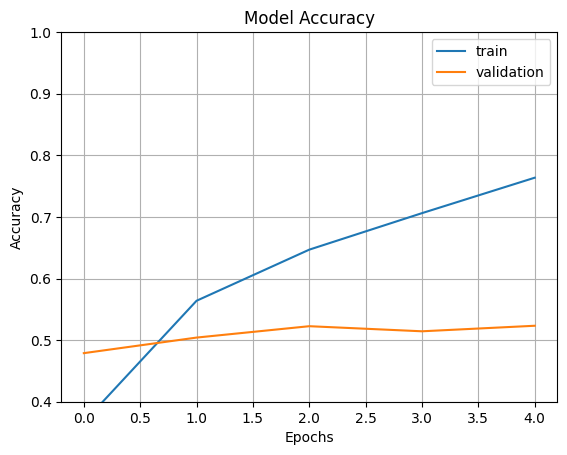

In [14]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

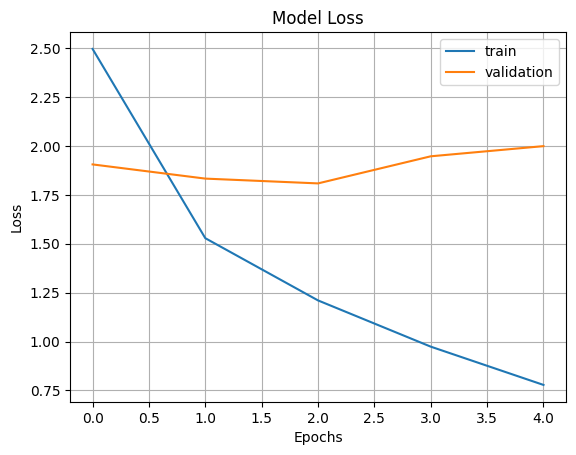

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [17]:
import cv2
image=cv2.imread(str(pomeranian_images[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 180, 180, 3)


In [18]:
pred=my_model.predict(image)
print(pred)

1/1 [==============================] - 1s 1s/step
[[3.52051705e-02 6.05357855e-06 2.16913340e-03 5.58528341e-02
  1.77661670e-04 1.83858511e-08 4.02064266e-04 5.92173637e-05
  1.13763910e-07 6.18688955e-06 8.76917852e-07 4.95727264e-08
  2.99253475e-06 4.38128081e-05 3.22177091e-10 5.96088567e-10
  8.75995332e-10 3.17610238e-06 3.20300879e-03 1.31802047e-02
  2.94732256e-08 5.85417524e-07 3.53321553e-07 1.59662901e-04
  4.50202133e-05 1.66965577e-07 1.95702002e-03 5.80899842e-11
  2.32085381e-06 4.04441636e-09 2.42225815e-05 1.17072659e-07
  2.42186779e-05 8.33768536e-06 8.70978646e-03 2.74761990e-02
  1.60101954e-05 1.35370018e-03 1.28852858e-04 1.57414306e-05
  1.07285462e-06 1.30026357e-03 1.90917242e-04 3.56429926e-04
  2.23859288e-07 1.33515159e-05 8.92100616e-06 4.72214667e-09
  7.60234427e-04 4.50231573e-06 8.45470481e-07 3.34836193e-03
  1.14885613e-03 2.79834028e-03 2.84915728e-07 1.07116351e-08
  1.58521107e-05 5.17065109e-06 7.62258765e-07 1.78602704e-07
  9.28183397e-07 1.5

In [19]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is n02111889-Samoyed
